In [1]:
#Importamos las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

#Prepocesado y modelado
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

#Evaluación de modelos
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Funciones auxiliares
from utils import *

#Eliminamos los warnings
import warnings
warnings.filterwarnings("ignore")

#Ponemos una opción para que nos muestre todas las columnas del dataset
pd.set_option('display.max_columns', None)

#Variables globales
SEED = 2023

## Ingeniería de variables

Vamos a preparar el dataset para aplicar los modelos

In [2]:
#Cargamos el dataset
df = pd.read_csv('data\dataset_modelos.csv')
df.head()

Lon        Lat  Metros  Habitaciones  Banos  Terraza  Ascensor  Aire  \
0  2.178732  41.381088      81             2      1        1         0     0   
1  2.179214  41.375745      88             2      2        1         0     1   
2  2.173433  41.383483     215             4      3        1         0     1   
3  2.166041  41.376619     257             2      3        1         0     0   
4  2.180536  41.384422      77             1      1        1         0     1   

   Garaje  Piscina  Jardin  Trastero  Armarios  Buen_Estado  Reformar  \
0       0        0       0         0         0            0         1   
1       0        0       0         0         1            1         0   
2       0        0       0         0         1            1         0   
3       0        0       0         0         1            1         0   
4       0        0       0         0         0            1         0   

   Exterior  Balcon  Chalet  Piso  Duplex    Precio_m2     Precio  Municipio  \
0         1       0       0     0       0  5185.185185   420000.0  Barcelona   
1         1       0       0     4       0  8522.727273   750000.0  Barcelona   
2         1       1       0     4       0  7860.465116  1690000.0  Barcelona   
3         1       0       0     4       0  5058.365759  1300000.0  Barcelona   
4         1       0       0     4       1  6168.831169   475000.0  Barcelona   

         Barrio  
0  Ciudad Vieja  
1  Ciudad Vieja  
2  Ciudad Vieja  
3  Ciudad Vieja  
4  Ciudad Vieja

Vamos a empezar eliminando las variables que no nos interesan del dataset.
Eliminamos las variables Lat y Lon ya que tenemos el Barrio de cada inmueble.

In [3]:
df.drop(['Lat', 'Lon'], axis = 1, inplace= True)

In [4]:
df.head()

Metros  Habitaciones  Banos  Terraza  Ascensor  Aire  Garaje  Piscina  \
0      81             2      1        1         0     0       0        0   
1      88             2      2        1         0     1       0        0   
2     215             4      3        1         0     1       0        0   
3     257             2      3        1         0     0       0        0   
4      77             1      1        1         0     1       0        0   

   Jardin  Trastero  Armarios  Buen_Estado  Reformar  Exterior  Balcon  \
0       0         0         0            0         1         1       0   
1       0         0         1            1         0         1       0   
2       0         0         1            1         0         1       1   
3       0         0         1            1         0         1       0   
4       0         0         0            1         0         1       0   

   Chalet  Piso  Duplex    Precio_m2     Precio  Municipio        Barrio  
0       0     0       0  5185.185185   420000.0  Barcelona  Ciudad Vieja  
1       0     4       0  8522.727273   750000.0  Barcelona  Ciudad Vieja  
2       0     4       0  7860.465116  1690000.0  Barcelona  Ciudad Vieja  
3       0     4       0  5058.365759  1300000.0  Barcelona  Ciudad Vieja  
4       0     4       1  6168.831169   475000.0  Barcelona  Ciudad Vieja

Eliminamos la variable Precio

In [5]:
df.drop(['Precio'], axis = 1, inplace= True)

Tal y como vimos anteriormente tenemos una fuerte correlación entre las variables Metros, Habitaciones y Banos. Nos vamos a quedar solo con la variable Metros para los modelos, eliminamos las otras.

In [6]:
df.drop(['Habitaciones', 'Banos'], axis = 1, inplace= True)

In [7]:
df.head()

Metros  Terraza  Ascensor  Aire  Garaje  Piscina  Jardin  Trastero  \
0      81        1         0     0       0        0       0         0   
1      88        1         0     1       0        0       0         0   
2     215        1         0     1       0        0       0         0   
3     257        1         0     0       0        0       0         0   
4      77        1         0     1       0        0       0         0   

   Armarios  Buen_Estado  Reformar  Exterior  Balcon  Chalet  Piso  Duplex  \
0         0            0         1         1       0       0     0       0   
1         1            1         0         1       0       0     4       0   
2         1            1         0         1       1       0     4       0   
3         1            1         0         1       0       0     4       0   
4         0            1         0         1       0       0     4       1   

     Precio_m2  Municipio        Barrio  
0  5185.185185  Barcelona  Ciudad Vieja  
1  8522.727273  Barcelona  Ciudad Vieja  
2  7860.465116  Barcelona  Ciudad Vieja  
3  5058.365759  Barcelona  Ciudad Vieja  
4  6168.831169  Barcelona  Ciudad Vieja

Vamos a realizar transformación de variables mediante OneHotEncoder de la variable Municipio y de la variable Piso

In [8]:
#OneHotEncoder de la variable Barrio
encoder = OneHotEncoder(sparse_output = False, handle_unknown ='ignore')
df_encoded = encoder.fit_transform(df[['Barrio']])
df_aux = pd.DataFrame (df_encoded, columns = np.array(encoder.categories_).ravel())
df = pd.concat ([df.reset_index (drop = True), df_aux.reset_index (drop = True)], axis = 1).drop(["Barrio"], axis = 1)
df.head()

Metros  Terraza  Ascensor  Aire  Garaje  Piscina  Jardin  Trastero  \
0      81        1         0     0       0        0       0         0   
1      88        1         0     1       0        0       0         0   
2     215        1         0     1       0        0       0         0   
3     257        1         0     0       0        0       0         0   
4      77        1         0     1       0        0       0         0   

   Armarios  Buen_Estado  Reformar  Exterior  Balcon  Chalet  Piso  Duplex  \
0         0            0         1         1       0       0     0       0   
1         1            1         0         1       0       0     4       0   
2         1            1         0         1       1       0     4       0   
3         1            1         0         1       0       0     4       0   
4         0            1         0         1       0       0     4       1   

     Precio_m2  Municipio  Arganzuela  Barajas  Carabanchel  Centro  \
0  5185.185185  Barcelona         0.0      0.0          0.0     0.0   
1  8522.727273  Barcelona         0.0      0.0          0.0     0.0   
2  7860.465116  Barcelona         0.0      0.0          0.0     0.0   
3  5058.365759  Barcelona         0.0      0.0          0.0     0.0   
4  6168.831169  Barcelona         0.0      0.0          0.0     0.0   

   Chamartín  Chamberí  Ciudad Lineal  Ciudad Vieja  Eixample  \
0        0.0       0.0            0.0           1.0       0.0   
1        0.0       0.0            0.0           1.0       0.0   
2        0.0       0.0            0.0           1.0       0.0   
3        0.0       0.0            0.0           1.0       0.0   
4        0.0       0.0            0.0           1.0       0.0   

   Fuencarral-El Pardo  Gracia  Horta-Guinardó  Hortaleza  Latina  \
0                  0.0     0.0             0.0        0.0     0.0   
1                  0.0     0.0             0.0        0.0     0.0   
2                  0.0     0.0             0.0        0.0     0.0   
3                  0.0     0.0             0.0        0.0     0.0   
4                  0.0     0.0             0.0        0.0     0.0   

   Moncloa-Aravaca  Moratalaz  Nou Barris  Puente de Vallecas  Retiro  \
0              0.0        0.0         0.0                 0.0     0.0   
1              0.0        0.0         0.0                 0.0     0.0   
2              0.0        0.0         0.0                 0.0     0.0   
3              0.0        0.0         0.0                 0.0     0.0   
4              0.0        0.0         0.0                 0.0     0.0   

   Salamanca  San Blas - Canillejas  Sann Martín  Sant Andreu  Sants-Montjuïc  \
0        0.0                    0.0          0.0          0.0             0.0   
1        0.0                    0.0          0.0          0.0             0.0   
2        0.0                    0.0          0.0          0.0             0.0   
3        0.0                    0.0          0.0          0.0             0.0   
4        0.0                    0.0          0.0          0.0             0.0   

   Sarrià - Sant Gervasi  Tetuán  Usera  Vicálvaro  Villa de Vallecas  \
0                    0.0     0.0    0.0        0.0                0.0   
1                    0.0     0.0    0.0        0.0                0.0   
2                    0.0     0.0    0.0        0.0                0.0   
3                    0.0     0.0    0.0        0.0                0.0   
4                    0.0     0.0    0.0        0.0                0.0   

   Villaverde  Villaverde Alto, Casco Histórico de Villaverde  les Corts  
0         0.0                                             0.0        0.0  
1         0.0                                             0.0        0.0  
2         0.0                                             0.0        0.0  
3         0.0                                             0.0        0.0  
4         0.0                                             0.0        0.0

In [9]:
#OneHotEncoder de la variable Piso
encoder = OneHotEncoder(sparse_output = False, handle_unknown ='ignore')
df_encoded = encoder.fit_transform(df[['Piso']])
df_aux = pd.DataFrame (df_encoded, columns = np.array(encoder.categories_).ravel())
df = pd.concat ([df.reset_index (drop = True), df_aux.reset_index (drop = True)], axis = 1).drop(["Piso"], axis = 1)
df.head()

Metros  Terraza  Ascensor  Aire  Garaje  Piscina  Jardin  Trastero  \
0      81        1         0     0       0        0       0         0   
1      88        1         0     1       0        0       0         0   
2     215        1         0     1       0        0       0         0   
3     257        1         0     0       0        0       0         0   
4      77        1         0     1       0        0       0         0   

   Armarios  Buen_Estado  Reformar  Exterior  Balcon  Chalet  Duplex  \
0         0            0         1         1       0       0       0   
1         1            1         0         1       0       0       0   
2         1            1         0         1       1       0       0   
3         1            1         0         1       0       0       0   
4         0            1         0         1       0       0       1   

     Precio_m2  Municipio  Arganzuela  Barajas  Carabanchel  Centro  \
0  5185.185185  Barcelona         0.0      0.0          0.0     0.0   
1  8522.727273  Barcelona         0.0      0.0          0.0     0.0   
2  7860.465116  Barcelona         0.0      0.0          0.0     0.0   
3  5058.365759  Barcelona         0.0      0.0          0.0     0.0   
4  6168.831169  Barcelona         0.0      0.0          0.0     0.0   

   Chamartín  Chamberí  Ciudad Lineal  Ciudad Vieja  Eixample  \
0        0.0       0.0            0.0           1.0       0.0   
1        0.0       0.0            0.0           1.0       0.0   
2        0.0       0.0            0.0           1.0       0.0   
3        0.0       0.0            0.0           1.0       0.0   
4        0.0       0.0            0.0           1.0       0.0   

   Fuencarral-El Pardo  Gracia  Horta-Guinardó  Hortaleza  Latina  \
0                  0.0     0.0             0.0        0.0     0.0   
1                  0.0     0.0             0.0        0.0     0.0   
2                  0.0     0.0             0.0        0.0     0.0   
3                  0.0     0.0             0.0        0.0     0.0   
4                  0.0     0.0             0.0        0.0     0.0   

   Moncloa-Aravaca  Moratalaz  Nou Barris  Puente de Vallecas  Retiro  \
0              0.0        0.0         0.0                 0.0     0.0   
1              0.0        0.0         0.0                 0.0     0.0   
2              0.0        0.0         0.0                 0.0     0.0   
3              0.0        0.0         0.0                 0.0     0.0   
4              0.0        0.0         0.0                 0.0     0.0   

   Salamanca  San Blas - Canillejas  Sann Martín  Sant Andreu  Sants-Montjuïc  \
0        0.0                    0.0          0.0          0.0             0.0   
1        0.0                    0.0          0.0          0.0             0.0   
2        0.0                    0.0          0.0          0.0             0.0   
3        0.0                    0.0          0.0          0.0             0.0   
4        0.0                    0.0          0.0          0.0             0.0   

   Sarrià - Sant Gervasi  Tetuán  Usera  Vicálvaro  Villa de Vallecas  \
0                    0.0     0.0    0.0        0.0                0.0   
1                    0.0     0.0    0.0        0.0                0.0   
2                    0.0     0.0    0.0        0.0                0.0   
3                    0.0     0.0    0.0        0.0                0.0   
4                    0.0     0.0    0.0        0.0                0.0   

   Villaverde  Villaverde Alto, Casco Histórico de Villaverde  les Corts    0  \
0         0.0                                             0.0        0.0  1.0   
1         0.0                                             0.0        0.0  0.0   
2         0.0                                             0.0        0.0  0.0   
3         0.0                                             0.0        0.0  0.0   
4         0.0                                             0.0        0.0  0.0   

     1    2    3    4    5    6    7    8    9

Cambiamos el nombre de las variables que son números para evitar problemas con los modelos

In [10]:
#Convertimos el nombre de las variables a string
df.columns = df.columns.astype(str)
# Expresión regular para encontrar columnas que comienzan con números
pattern = r'^\d'
columns_to_rename = [col for col in df.columns if pd.Series(col).str.match(pattern).any()]

# Crear un diccionario de mapeo de nombres nuevos
rename_mapping = {col: f'Piso_{col}' for col in columns_to_rename}

# Cambiar los nombres de las columnas
df.rename(columns=rename_mapping, inplace=True)

#Comprobamos el resultado
df.columns

Index(['Metros', 'Terraza', 'Ascensor', 'Aire', 'Garaje', 'Piscina', 'Jardin',
       'Trastero', 'Armarios', 'Buen_Estado', 'Reformar', 'Exterior', 'Balcon',
       'Chalet', 'Duplex', 'Precio_m2', 'Municipio', 'Arganzuela', 'Barajas',
       'Carabanchel', 'Centro', 'Chamartín', 'Chamberí', 'Ciudad Lineal',
       'Ciudad Vieja', 'Eixample', 'Fuencarral-El Pardo', 'Gracia',
       'Horta-Guinardó', 'Hortaleza', 'Latina', 'Moncloa-Aravaca', 'Moratalaz',
       'Nou Barris', 'Puente de Vallecas', 'Retiro', 'Salamanca',
       'San Blas - Canillejas', 'Sann Martín', 'Sant Andreu', 'Sants-Montjuïc',
       'Sarrià - Sant Gervasi', 'Tetuán', 'Usera', 'Vicálvaro',
       'Villa de Vallecas', 'Villaverde',
       'Villaverde Alto, Casco Histórico de Villaverde', 'les Corts', 'Piso_0',
       'Piso_1', 'Piso_2', 'Piso_3', 'Piso_4', 'Piso_5', 'Piso_6', 'Piso_7',
       'Piso_8', 'Piso_9', 'Piso_10', 'Piso_11', 'Piso_12', 'Piso_13',
       'Piso_14', 'Piso_15', 'Piso_16', 'Piso_17', 'Piso_20',

## Vamos a realizar los modelos separando los municipios de Madrid y Barcelona

In [11]:
#Creamos los dos dataset
df_Madrid = df.loc[df['Municipio'] == 'Madrid']
df_Barcelona = df.loc[df['Municipio'] == 'Barcelona']

In [12]:
#Eliminamos la variable Municipio de los dataset
df_Madrid.drop(['Municipio'], axis= 1, inplace= True)
df_Barcelona.drop(['Municipio'], axis= 1, inplace= True)


Separamos los datos de test y entrenamiento para los municipios de Madrid y Barcelona

In [13]:
X_train_Madrid, X_test_Madrid, y_train_Madrid, y_test_Madrid = train_test_split(
    df_Madrid.drop("Precio_m2", axis=1),
    df_Madrid["Precio_m2"],
    test_size=0.2,
    random_state = SEED
)

In [14]:
X_train_Barcelona, X_test_Barcelona, y_train_Barcelona, y_test_Barcelona = train_test_split(
    df_Barcelona.drop("Precio_m2", axis=1),
    df_Barcelona["Precio_m2"],
    test_size=0.2,
    random_state = SEED
)

### Entrenamos el modelo mediante un algoritmo de regresión lineal para el municipio de Madrid y Barcelona

In [15]:
#Algoritmo para la ciudad de Madrid
modelo_Madrid = LinearRegression()
modelo_Madrid.fit(X = X_train_Madrid, y = y_train_Madrid)

LinearRegression()

Error cuadrático medio (MSE): 2059994.3419240303
Raíz del Error Cuadrático Medio (RMSE): 1435.2680383552163
R-cuadrado (R²): 0.47703339823819824
MAE en el conjunto de prueba: 1044.756758256195


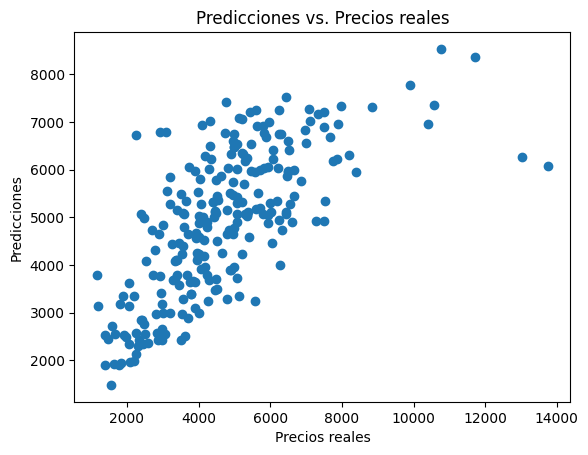

In [16]:
# Evaluamos el modelo y graficamos las predicciones vs resultados reales
evaluar_modelo(modelo_Madrid, X_test_Madrid, y_test_Madrid)

In [17]:
#Algoritmo para la ciudad de Barcelona
modelo_Barcelona = LinearRegression()
modelo_Barcelona.fit(X = X_train_Barcelona, y = y_train_Barcelona)

LinearRegression()

In [18]:
# Evaluamos el modelo y graficamos las predicciones vs resultados reales
evaluar_modelo(modelo_Barcelona, X_test_Barcelona, y_test_Barcelona)

Error cuadrático medio (MSE): 3779111.508003482
Raíz del Error Cuadrático Medio (RMSE): 1943.993700607973
R-cuadrado (R²): 0.1576009037329541
MAE en el conjunto de prueba: 1490.9270009208642


### Entrenamos el modelo mediante un algoritmo de árbol de decisión para el municipio de Madrid

Vamos a optimizar el hiperparámetro cc_alpha y a realizar una validación cruzada

In [19]:
#Evaluamos el parámetro entre 0 y 30 con pasos cada 0.3
param_grid = {'ccp_alpha':np.linspace(0, 0.03, 30)} 

In [20]:
# Entrenamos el modelo mediante validación cruzada
grid_Madrid = GridSearchCV(
    estimator=DecisionTreeRegressor(
        max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=SEED
    ),
    param_grid=param_grid,
    cv=5,
    refit=True,
    return_train_score=True
)

grid_Madrid.fit(X_train_Madrid, y_train_Madrid)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=2023),
             param_grid={'ccp_alpha': array([0.        , 0.00103448, 0.00206897, 0.00310345, 0.00413793,
       0.00517241, 0.0062069 , 0.00724138, 0.00827586, 0.00931034,
       0.01034483, 0.01137931, 0.01241379, 0.01344828, 0.01448276,
       0.01551724, 0.01655172, 0.01758621, 0.01862069, 0.01965517,
       0.02068966, 0.02172414, 0.02275862, 0.0237931 , 0.02482759,
       0.02586207, 0.02689655, 0.02793103, 0.02896552, 0.03      ])},
             return_train_score=True)

In [21]:
#Mejor parámetro ccp_alpha
grid_Madrid.best_params_

{'ccp_alpha': 0.005172413793103448}

In [22]:
#Profundidad del árbol
ultimo_modelo_Madrid = grid_Madrid.best_estimator_
print(f"Profundidad del árbol: {ultimo_modelo_Madrid.get_depth()}")
print(f"Número de nodos terminales: {ultimo_modelo_Madrid.get_n_leaves()}")

Profundidad del árbol: 31
Número de nodos terminales: 903


Evaluamos el modelo

Error cuadrático medio (MSE): 3032057.810914853
Raíz del Error Cuadrático Medio (RMSE): 1741.2805089688602
R-cuadrado (R²): 0.23025760923281924
MAE en el conjunto de prueba: 1070.391203483137


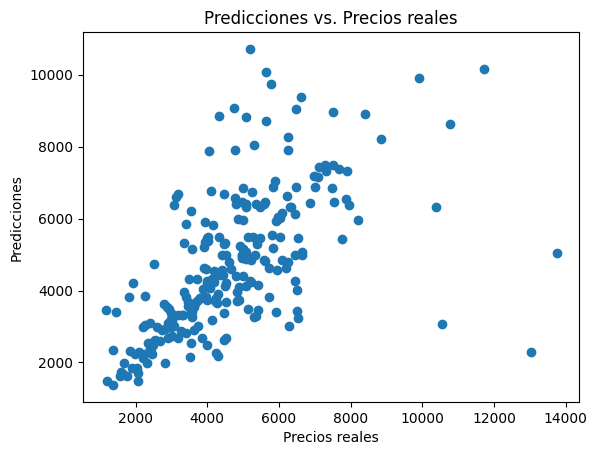

In [23]:
evaluar_modelo(ultimo_modelo_Madrid, X_test_Madrid, y_test_Madrid)

### Entrenamos el modelo mediante un algoritmo de árbol de decisión para el municipio de Barcelona

Vamos a optimizar el hiperparámetro cc_alpha y a realizar una validación cruzada

In [24]:
# Entrenamos el modelo mediante validación cruzada
grid_Barcelona = GridSearchCV(
    estimator=DecisionTreeRegressor(
        max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=SEED
    ),
    param_grid=param_grid,
    cv=5,
    refit=True,
    return_train_score=True
)

grid_Barcelona.fit(X_train_Barcelona, y_train_Barcelona)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=2023),
             param_grid={'ccp_alpha': array([0.        , 0.00103448, 0.00206897, 0.00310345, 0.00413793,
       0.00517241, 0.0062069 , 0.00724138, 0.00827586, 0.00931034,
       0.01034483, 0.01137931, 0.01241379, 0.01344828, 0.01448276,
       0.01551724, 0.01655172, 0.01758621, 0.01862069, 0.01965517,
       0.02068966, 0.02172414, 0.02275862, 0.0237931 , 0.02482759,
       0.02586207, 0.02689655, 0.02793103, 0.02896552, 0.03      ])},
             return_train_score=True)

In [25]:
#Mejor parámetro ccp_alpha
grid_Barcelona.best_params_

{'ccp_alpha': 0.0031034482758620693}

In [26]:
#Profundidad del árbol
ultimo_modelo_Barcelona = grid_Barcelona.best_estimator_
print(f"Profundidad del árbol: {ultimo_modelo_Barcelona.get_depth()}")
print(f"Número de nodos terminales: {ultimo_modelo_Barcelona.get_n_leaves()}")

Profundidad del árbol: 24
Número de nodos terminales: 357


Evaluamos el modelo

In [27]:
evaluar_modelo(ultimo_modelo_Barcelona, X_test_Barcelona, y_test_Barcelona)

Error cuadrático medio (MSE): 6058903.979794346
Raíz del Error Cuadrático Medio (RMSE): 2461.4841010647106
R-cuadrado (R²): -0.3505860375218286
MAE en el conjunto de prueba: 1747.3444166602233


### Entrenamos el modelo con un algoritmo de regularización Lasso para el municipio de Madrid

In [28]:
#Definimos los posibles valores de alpha para optimizar
param_grid = {'alpha': np.linspace(-5, 5, 50)}
param_grid

{'alpha': array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
        -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
        -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
        -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
        -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
         0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
         1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
         2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
         3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
         4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ])}

In [29]:
#Entrenamos el modelo mediante validación cruzada
grid_Madrid = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_Madrid.fit(X_train_Madrid, y_train_Madrid)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
       -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
       -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
       -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
       -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
        0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
        1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
        2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
        3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
        4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ])},
             scoring='neg_mean_squared_error')

In [30]:
#Mejor parámetro alpha
grid_Madrid.best_params_

{'alpha': 1.3265306122448983}

In [31]:
#Mejor modelo
best_lasso_Madrid = grid_Madrid.best_estimator_

Error cuadrático medio (MSE): 2035166.7382979044
Raíz del Error Cuadrático Medio (RMSE): 1426.5927023148213
R-cuadrado (R²): 0.48333633181136393
MAE en el conjunto de prueba: 1037.7276887564956


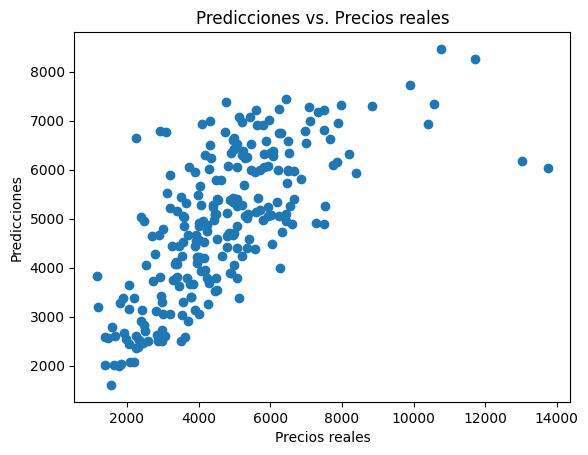

In [32]:
evaluar_modelo(best_lasso_Madrid, X_test_Madrid, y_test_Madrid)

### Entrenamos el modelo con un algoritmo de regularización Lasso para el municipio de Madrid

In [33]:
#Entrenamos el modelo mediante validación cruzada
grid_Barcelona = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_Barcelona.fit(X_train_Barcelona, y_train_Barcelona)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
       -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
       -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
       -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
       -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
        0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
        1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
        2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
        3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
        4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ])},
             scoring='neg_mean_squared_error')

In [34]:
#Mejor parámetro alpha
grid_Barcelona.best_params_

{'alpha': 5.0}

In [35]:
#Mejor modelo
best_lasso_Barcelona = grid_Barcelona.best_estimator_

In [36]:
evaluar_modelo(best_lasso_Barcelona, X_test_Barcelona, y_test_Barcelona)

Error cuadrático medio (MSE): 3746366.572437372
Raíz del Error Cuadrático Medio (RMSE): 1935.553298784968
R-cuadrado (R²): 0.16490005435864874
MAE en el conjunto de prueba: 1488.6991456965854


## Resumen de las métricas de los modelos evaluados

MUNICPIO DE MADRID

| Modelo            | MSE       | RMSE     | R-Cuadrado | MAE    |
|-------------------|-----------|----------|------------|--------|
| Linear Regression | 2.059.994 | 1.435,26 | 0,4770     | 1.044  |
| Random Forest     | 3.032.057 | 1.741,28 | 0,2302     | 1.070  |
| Lasso             | 2.035.503 | 1.426,71 | 0,4832     | 1.037  |


MUNICPIO DE BARCELONA

| Modelo            | MSE       | RMSE     | R-Cuadrado | MAE    |
|-------------------|-----------|----------|------------|--------|
| Linear Regression | 3.779.111 | 1.943,99 | 0,1576     | 1.490  |
| Random Forest     | 6.058.903 | 2.461,48 | -0,3505    | 1.747  |
| Lasso             | 3.746.366 | 1.935,55 | 0,1649     | 1.488  |


El mejor modelo es el modelo de regresion lineal con regularización L1 Lasso.

### Vamos a añadir la predicción del modelo al dataset para encontrar posibles opciones de inversión

Primero vamos a quitar la varible target (Precio_m2) para poder hacer la predicción.

In [37]:
#Almacenamos la variable target y la eliminamos del dataset
Precio_m2_Madrid = df_Madrid.Precio_m2
df_Madrid.drop(['Precio_m2'], axis = 1, inplace= True)
Precio_m2_Barcelona = df_Barcelona.Precio_m2
df_Barcelona.drop(['Precio_m2'], axis = 1, inplace= True)

Realizamos la predicción con el modelo Lasso

In [38]:
pred_Madrid = best_lasso_Madrid.predict(df_Madrid)
pred_Barcelona = best_lasso_Barcelona.predict(df_Barcelona)

Recuperamos los datos iniciales del dataset para añadir las predicciones

In [39]:
#Cargamos el dataset inicial
df_aux = pd.read_csv('data\dataset_modelos.csv')
#Dividimos los datos por municipio
df_Madrid_pred = df_aux.loc[df_aux['Municipio'] == 'Madrid']
df_Barcelona_pred = df_aux.loc[df_aux['Municipio'] == 'Barcelona']


In [40]:
#Añadimos la columna con los datos de la predicción del modelo
df_Madrid_pred['Precio_m2_pred'] = pred_Madrid
df_Barcelona_pred['Precio_m2_pred'] = pred_Barcelona

Vamos a añadir una variable que nos diga la desviación % entre el precio y el precio predicho

In [41]:
df_Madrid_pred['Desv_precio_m2'] = df_Madrid_pred['Precio_m2_pred']/df_Madrid_pred['Precio_m2']
df_Barcelona_pred['Desv_precio_m2'] = df_Barcelona_pred['Precio_m2_pred']/df_Barcelona_pred['Precio_m2']

Vamos a añadir una columna con la diferencia del Precio_m2 y la media de ese barrio

In [42]:
df_Madrid_pred['Dif_Precio_m2_media_barrio'] = df_Madrid_pred['Precio_m2'] - df_Madrid_pred.groupby('Barrio')['Precio_m2'].transform('mean')
df_Barcelona_pred['Dif_Precio_m2_media_barrio'] = df_Barcelona_pred['Precio_m2'] - df_Barcelona_pred.groupby('Barrio')['Precio_m2'].transform('mean')

Vamos a ordenar los inmuebles para ver cuales son los que presentan mayor desviación entre la predicción y el valor de venta

In [43]:
df_Madrid_pred.sort_values(by='Desv_precio_m2', ascending= False).head(10)

Lon        Lat  Metros  Habitaciones  Banos  Terraza  Ascensor  \
1252 -3.663809  40.375678     134             4      2        1         0   
1234 -3.728391  40.469917     720             7      6        1         1   
1248 -3.670794  40.381571      80             2      1        1         0   
1472 -3.627111  40.438616     300             4      1        1         0   
1219 -3.727391  40.472217     720             7      6        1         1   
1460 -3.625699  40.439555     275             2      2        1         0   
1413 -3.664549  40.435398     130             2      1        1         1   
1151 -3.752320  40.407940     127             4      2        1         1   
757  -3.704286  40.415655     394             4      3        1         1   
1161 -3.739013  40.407054      56             2      1        1         0   

      Aire  Garaje  Piscina  Jardin  Trastero  Armarios  Buen_Estado  \
1252     0       0        0       0         0         0            0   
1234     1       1        1       1         0         0            0   
1248     1       0        0       0         0         1            1   
1472     1       1        0       0         1         0            1   
1219     1       1        1       0         1         1            1   
1460     1       1        0       0         0         0            0   
1413     1       0        0       0         1         1            1   
1151     1       0        0       0         0         1            0   
757      1       1        0       0         1         1            1   
1161     1       0        0       0         0         1            0   

      Reformar  Exterior  Balcon  Chalet  Piso  Duplex    Precio_m2  \
1252         0         1       0       0     7       0  1164.179104   
1234         0         0       0       0     5       0  2263.888889   
1248         0         1       0       0     5       0  1187.500000   
1472         0         1       0       0     3       0  1200.000000   
1219         0         1       0       0     5       0  2263.888889   
1460         1         1       0       0     5       0  1272.727273   
1413         0         1       0       0     5       0  3061.538462   
1151         0         1       0       0     0       0  2283.464567   
757          0         1       1       0     5       0  2918.781726   
1161         0         1       0       0     4       0  1696.428571   

         Precio Municipio                 Barrio  Precio_m2_pred  \
1252   156000.0    Madrid     Puente de Vallecas     3826.627666   
1234  1630000.0    Madrid        Moncloa-Aravaca     6648.992044   
1248    95000.0    Madrid     Puente de Vallecas     3198.122423   
1472   360000.0    Madrid  San Blas - Canillejas     3119.902411   
1219  1630000.0    Madrid        Moncloa-Aravaca     5760.820244   
1460   350000.0    Madrid  San Blas - Canillejas     3056.301332   
1413   398000.0    Madrid              Salamanca     7334.915972   
1151   290000.0    Madrid        Moncloa-Aravaca     5431.509185   
757   1150000.0    Madrid                 Centro     6781.370232   
1161    95000.0    Madrid                 Latina     3849.660539   

      Desv_precio_m2  Dif_Precio_m2_media_barrio  
1252        3.286975                -1359.579193  
1234        2.936978                -3024.833502  
1248        2.693156                -1336.258297  
1472        2.599919                -2245.645247  
1219        2.544657                -3024.833502  
1460        2.401380                -2172.917975  
1413        2.395827                -4075.742512  
1151        2.378626                -3005.257824  
757         2.323356                -3345.484503  
1161        2.269274                -1703.685085

In [44]:
df_Barcelona_pred.sort_values(by='Desv_precio_m2', ascending= False).head(10)

Lon        Lat  Metros  Habitaciones  Banos  Terraza  Ascensor  \
37   2.176414  41.380304     195             3      2        1         0   
285  2.190451  41.449495     210             5      3        1         0   
377  2.136897  41.362755     150             5      2        1         1   
115  2.152783  41.375792     197             4      1        1         0   
240  2.169210  41.420626     200             3      1        1         0   
350  2.128149  41.372655     150             2      2        1         0   
281  2.192202  41.453238      52             3      1        1         0   
268  2.166795  41.431015      85             4      2        1         0   
70   2.168739  41.379792     100             2      2        1         0   
9    2.168550  41.379059      85             2      2        1         0   

     Aire  Garaje  Piscina  Jardin  Trastero  Armarios  Buen_Estado  Reformar  \
37      0       0        0       0         0         0            0         1   
285     1       0        0       1         0         1            1         0   
377     0       0        0       0         1         1            1         0   
115     1       0        0       0         0         1            1         0   
240     1       0        0       0         0         0            1         0   
350     0       0        0       0         0         0            0         1   
281     0       0        0       0         0         1            1         0   
268     0       0        0       0         0         0            1         0   
70      1       0        0       0         1         1            1         0   
9       1       0        0       0         0         0            1         0   

     Exterior  Balcon  Chalet  Piso  Duplex    Precio_m2    Precio  Municipio  \
37          1       0       0     4       0  1723.076923  336000.0  Barcelona   
285         1       1       0     2       0  1852.380952  389000.0  Barcelona   
377         1       0       0     9       0  2060.000000  309000.0  Barcelona   
115         1       0       0     4       0  2791.878173  550000.0  Barcelona   
240         1       0       0     2       0  1700.000000  340000.0  Barcelona   
350         0       0       1     0       0  1800.000000  270000.0  Barcelona   
281         1       0       0     5       0  1865.384615   97000.0  Barcelona   
268         1       0       0     0       0  2000.000000  170000.0  Barcelona   
70          1       1       0     5       0  2900.000000  290000.0  Barcelona   
9           1       1       0     5       0  2811.764706  239000.0  Barcelona   

             Barrio  Precio_m2_pred  Desv_precio_m2  \
37     Ciudad Vieja     4659.801286        2.704349   
285     Sant Andreu     4350.273347        2.348477   
377  Sants-Montjuïc     4813.481658        2.336642   
115        Eixample     6308.457426        2.259575   
240  Horta-Guinardó     3807.580327        2.239753   
350  Sants-Montjuïc     3824.884485        2.124936   
281     Sant Andreu     3873.671497        2.076607   
268      Nou Barris     3925.023618        1.962512   
70     Ciudad Vieja     5535.995190        1.908964   
9      Ciudad Vieja     5296.012286        1.883519   

     Dif_Precio_m2_media_barrio  
37                 -3997.379952  
285                -1709.232302  
377                -2657.706547  
115                -3491.767441  
240                -2050.847240  
350                -2917.706547  
281                -1696.228639  
268                -1706.435548  
70                 -2820.456875  
9                  -2908.692169

Vamos a ordenar los inmuebles para ver cuales son los que tienen su Precio_m2 mas bajo respecto a la media de su barrio

In [45]:
df_Madrid_pred.sort_values(by='Dif_Precio_m2_media_barrio').head(30)

Lon        Lat  Metros  Habitaciones  Banos  Terraza  Ascensor  \
1413 -3.664549  40.435398     130             2      1        1         1   
1422 -3.675602  40.438178     125             3      2        1         0   
1403 -3.666806  40.431018     138             1      1        1         1   
1371 -3.668899  40.433227     110             2      1        1         1   
757  -3.704286  40.415655     394             4      3        1         1   
1346 -3.673409  40.437229     213             3      4        1         0   
1365 -3.672420  40.437644      72             2      1        1         0   
743  -3.697877  40.411333     141             1      1        1         1   
1380 -3.671021  40.437344      70             2      1        1         0   
1219 -3.727391  40.472217     720             7      6        1         1   
1234 -3.728391  40.469917     720             7      6        1         1   
1151 -3.752320  40.407940     127             4      2        1         1   
673  -3.703430  40.410792     330             4      3        1         0   
887  -3.701044  40.443149     229             5      3        1         1   
1396 -3.679495  40.434718     213             6      3        1         1   
956  -3.704668  40.443182     184             4      3        1         0   
1384 -3.666351  40.424390      60             2      1        1         0   
732  -3.704848  40.422531      70             1      1        0         0   
1395 -3.666228  40.430369      88             1      1        1         1   
1385 -3.679495  40.435518     208             5      3        1         1   
1533 -3.699538  40.445043     173             2      1        1         1   
680  -3.703330  40.413491     330             4      2        1         1   
908  -3.715768  40.438896     380             4      3        1         1   
957  -3.715768  40.441796     379             4      5        1         1   
1537 -3.686710  40.472144     173             5      3        1         1   
954  -3.714350  40.435650     142             4      2        1         1   
688  -3.705299  40.415097     265             3      2        0         1   
942  -3.713450  40.435850     140             4      2        1         1   
1516 -3.699537  40.461796     101             2      1        1         0   
1404 -3.673509  40.437229     213             3      4        1         1   

      Aire  Garaje  Piscina  Jardin  Trastero  Armarios  Buen_Estado  \
1413     1       0        0       0         1         1            1   
1422     1       0        0       0         0         1            1   
1403     1       0        0       1         1         1            1   
1371     0       0        0       0         0         1            0   
757      1       1        0       0         1         1            1   
1346     1       0        0       0         0         1            1   
1365     1       0        0       0         0         1            1   
743      1       0        0       0         0         1            0   
1380     1       0        0       0         0         1            1   
1219     1       1        1       0         1         1            1   
1234     1       1        1       1         0         0            0   
1151     1       0        0       0         0         1            0   
673      1       0        0       0         0         0            1   
887      0       1        0       0         0         0            0   
1396     1       0        0       0         0         0            0   
956      1       0        0       0         0         0            0   
1384     1       0        0       0         0         0            0   
732      0       0        0       0         0         0            1   
1395     0       0        0       1         0         0            0   
1385     1       0        0       0         0         1            0   
1533     1       0        0       0         0         0            1   
680      1       0        0       0    

In [46]:
df_Barcelona_pred.sort_values(by='Dif_Precio_m2_media_barrio').head(30)

Lon        Lat  Metros  Habitaciones  Banos  Terraza  Ascensor  \
37   2.176414  41.380304     195             3      2        1         0   
115  2.152783  41.375792     197             4      1        1         0   
350  2.128149  41.372655     150             2      2        1         0   
9    2.168550  41.379059      85             2      2        1         0   
70   2.168739  41.379792     100             2      2        1         0   
134  2.154508  41.383646     135             4      3        1         0   
30   2.164525  41.379095      89             2      1        1         1   
62   2.165948  41.380403     120             4      2        1         0   
377  2.136897  41.362755     150             5      2        1         1   
325  2.186507  41.397103      90             3      1        1         1   
21   2.170815  41.378958      70             1      1        1         0   
86   2.179097  41.396531     185             5      2        1         0   
68   2.177363  41.381318     138             5      2        1         1   
38   2.173848  41.381890      90             3      1        1         0   
32   2.170414  41.384263      90             3      1        1         0   
418  2.161633  41.374062     150             3      1        1         0   
438  2.129519  41.399720     555             4      4        1         0   
153  2.181443  41.395805     106             2      2        1         0   
301  2.179983  41.411264     150             4      1        1         0   
180  2.156907  41.401158      67             2      1        1         0   
117  2.158075  41.378323     124             2      2        1         0   
148  2.185392  41.402115      60             1      1        1         0   
138  2.183092  41.403715      60             1      1        1         0   
114  2.181881  41.402796      60             1      1        1         0   
141  2.178695  41.394421     118             3      1        1         0   
339  2.165595  41.375554     125             3      2        1         0   
380  2.167871  41.375703      49             2      1        0         0   
443  2.144633  41.404814     225             4      3        1         0   
53   2.165329  41.377810      69             2      1        1         0   
90   2.162675  41.380887     207             4      2        1         0   

     Aire  Garaje  Piscina  Jardin  Trastero  Armarios  Buen_Estado  Reformar  \
37      0       0        0       0         0         0            0         1   
115     1       0        0       0         0         1            1         0   
350     0       0        0       0         0         0            0         1   
9       1       0        0       0         0         0            1         0   
70      1       0        0       0         1         1            1         0   
134     0       0        0       0         0         0            1         0   
30      0       0        0       0         0         0            0         1   
62      1       0        0       0         0         1            1         0   
377     0       0        0       0         1         1            1         0   
325     1       0        0       0         0         1            1         0   
21      1       0        0       0         0         0            1         0   
86      1       0        0       0         0         0            0         0   
68      0       0        0       0         0         1            1         0   
38      0       0        0       0         0         0            1         0   
32      0       0        0       0         0         0            1         0   
418     0       0        0       0         0         0            0         1   
438     1       1        1       0         1         1            1         0   
153     1       0        0       0         0         1            1         0   
301     0       0        0       0         0         0            0         1   
180     1       0        0       

Para tomar la decisión de los inmuebles en los que vamos a invertir, pensamos que es mejor diversificar en los distintos barrios de la ciudad. Vamos a obtener un listado con los dos inmuebles con el porcentaje de desviación más elevado de cada barrio, como son muchos barrios solo nos interesan los inmuebles con una desvición superior a 2.

In [47]:
top2_por_barrio_Madrid = df_Madrid_pred.loc[df_Madrid_pred['Desv_precio_m2']>2].groupby('Barrio').apply(lambda x: x.nlargest(2, 'Desv_precio_m2')).reset_index(drop=True)
top2_por_barrio_Barcelona = df_Barcelona_pred.loc[df_Barcelona_pred['Desv_precio_m2']>2].groupby('Barrio').apply(lambda x: x.nlargest(2, 'Desv_precio_m2')).reset_index(drop=True)

Por último vamos a añadir la una columna con el precio estimado de venta de cada inmueble.

In [48]:
top2_por_barrio_Madrid['Precio_est'] = top2_por_barrio_Madrid['Metros']*top2_por_barrio_Madrid['Precio_m2_pred']
top2_por_barrio_Barcelona['Precio_est'] = top2_por_barrio_Barcelona['Metros']*top2_por_barrio_Barcelona['Precio_m2_pred']

Vamos a mostrar los inmuebles donde invertir en el mapa

In [53]:
top2_por_barrio_Madrid

Lon        Lat  Metros  Habitaciones  Banos  Terraza  Ascensor  Aire  \
0  -3.691434  40.387828     334             3      2        1         0     1   
1  -3.690534  40.386328     334             3      2        1         0     1   
2  -3.704286  40.415655     394             4      3        1         1     1   
3  -3.686710  40.472144     173             5      3        1         1     1   
4  -3.663550  40.490475     202             2      2        1         1     1   
5  -3.739013  40.407054      56             2      1        1         0     1   
6  -3.756470  40.403564      80             3      1        0         0     0   
7  -3.728391  40.469917     720             7      6        1         1     1   
8  -3.727391  40.472217     720             7      6        1         1     1   
9  -3.663809  40.375678     134             4      2        1         0     0   
10 -3.670794  40.381571      80             2      1        1         0     1   
11 -3.664549  40.435398     130             2      1        1         1     1   
12 -3.675602  40.438178     125             3      2        1         0     1   
13 -3.627111  40.438616     300             4      1        1         0     1   
14 -3.625699  40.439555     275             2      2        1         0     1   
15 -3.699537  40.461796     101             2      1        1         0     0   
16 -3.688060  40.368105     162             2      1        1         1     0   
17 -3.707981  40.385600      90             1      1        1         0     1   

    Garaje  Piscina  Jardin  Trastero  Armarios  Buen_Estado  Reformar  \
0        1        0       0         1         1            1         0   
1        1        0       0         1         1            1         0   
2        1        0       0         1         1            1         0   
3        0        0       0         1         1            1         0   
4        1        1       0         1         1            1         0   
5        0        0       0         0         1            0         0   
6        0        0       0         0         1            1         0   
7        1        1       1         0         0            0         0   
8        1        1       0         1         1            1         0   
9        0        0       0         0         0            0         0   
10       0        0       0         0         1            1         0   
11       0        0       0         1         1            1         0   
12       0        0       0         0         1            1         0   
13       1        0       0         1         0            1         0   
14       1        0       0         0         0            0         1   
15       0        0       0         1         1            1         0   
16       1        1       0         1         1            0         1   
17       0        0       0         0         0            1         0   

    Exterior  Balcon  Chalet  Piso  Duplex    Precio_m2     Precio Municipio  \
0          1       0       0     5       0  2392.215569   799000.0    Madrid   
1          1       0       0     5       0  2392.215569   799000.0    Madrid   
2          1       1       0     5       0  2918.781726  1150000.0    Madrid   
3          1       0       0    10       0  3468.208092   600000.0    Madrid   
4          1       0       0     7       0  2544.554455   514000.0    Madrid   
5          1       0       0     4       0  1696.428571    95000.0    Madrid   
6          1       1       0     5       0  1750.000000   140000.0    Madrid   
7          0       0       0     5       0  2263.888889  1630000.0    Madrid   
8          1       0       0     5       0  2263.888889  1630000.0    Madrid   
9          1       0       0     7       0  1164.179104   156000.0    Madrid   
10         1       0       0     5       0  1187.500000    95000.0    Madrid   
11         1       0       0     5       0  3061.538462   398000.0    Madrid   
12         1       0  

In [49]:
my_map = dibujar_mapa(top2_por_barrio_Madrid, "Lat", "Lon", "Precio")
my_map

In [54]:
top2_por_barrio_Barcelona

Lon        Lat  Metros  Habitaciones  Banos  Terraza  Ascensor  Aire  \
0  2.176414  41.380304     195             3      2        1         0     0   
1  2.152783  41.375792     197             4      1        1         0     1   
2  2.169210  41.420626     200             3      1        1         0     1   
3  2.190451  41.449495     210             5      3        1         0     1   
4  2.192202  41.453238      52             3      1        1         0     0   
5  2.136897  41.362755     150             5      2        1         1     0   
6  2.128149  41.372655     150             2      2        1         0     0   

   Garaje  Piscina  Jardin  Trastero  Armarios  Buen_Estado  Reformar  \
0       0        0       0         0         0            0         1   
1       0        0       0         0         1            1         0   
2       0        0       0         0         0            1         0   
3       0        0       1         0         1            1         0   
4       0        0       0         0         1            1         0   
5       0        0       0         1         1            1         0   
6       0        0       0         0         0            0         1   

   Exterior  Balcon  Chalet  Piso  Duplex    Precio_m2    Precio  Municipio  \
0         1       0       0     4       0  1723.076923  336000.0  Barcelona   
1         1       0       0     4       0  2791.878173  550000.0  Barcelona   
2         1       0       0     2       0  1700.000000  340000.0  Barcelona   
3         1       1       0     2       0  1852.380952  389000.0  Barcelona   
4         1       0       0     5       0  1865.384615   97000.0  Barcelona   
5         1       0       0     9       0  2060.000000  309000.0  Barcelona   
6         0       0       1     0       0  1800.000000  270000.0  Barcelona   

           Barrio  Precio_m2_pred  Desv_precio_m2  Dif_Precio_m2_media_barrio  \
0    Ciudad Vieja     4659.801286        2.704349                -3997.379952   
1        Eixample     6308.457426        2.259575                -3491.767441   
2  Horta-Guinardó     3807.580327        2.239753                -2050.847240   
3     Sant Andreu     4350.273347        2.348477                -1709.232302   
4     Sant Andreu     3873.671497        2.076607                -1696.228639   
5  Sants-Montjuïc     4813.481658        2.336642                -2657.706547   
6  Sants-Montjuïc     3824.884485        2.124936                -2917.706547   

     Precio_est  
0  9.086613e+05  
1  1.242766e+06  
2  7.615161e+05  
3  9.135574e+05  
4  2.014309e+05  
5  7.220222e+05  
6  5.737327e+05

In [50]:
my_map = dibujar_mapa(top2_por_barrio_Barcelona, "Lat", "Lon", "Precio")
my_map

Vamos a calcular el importe de la inversión que debemos de realizar y el retorno esperado segun nuestro algoritmo de predicción.

In [51]:
compra_Madrid = top2_por_barrio_Madrid['Precio'].sum()
venta_Madrid = top2_por_barrio_Madrid['Precio_est'].sum()
compra_Barcelona = top2_por_barrio_Barcelona['Precio'].sum()
venta_Barcelona = top2_por_barrio_Barcelona['Precio_est'].sum()

In [52]:
print (f'La inversión total de los inmuebles en la ciudad de Madrid asciende a {compra_Madrid:.2f}€, se espera un beneficio bruto de {venta_Madrid - compra_Madrid:.2f}€ ({(venta_Madrid - compra_Madrid)*100/compra_Madrid:.2f}%)')
print (f'La inversión total de los inmuebles en la ciudad de Madrid asciende a {compra_Barcelona:.2f}€, se espera un beneficio bruto de {venta_Barcelona - compra_Barcelona:.2f}€ ({(venta_Barcelona- compra_Barcelona)*100/compra_Barcelona:.2f}%)')

La inversión total de los inmuebles en la ciudad de Madrid asciende a 9637000.00€, se espera un beneficio bruto de 13652693.82€ (141.67%)
La inversión total de los inmuebles en la ciudad de Madrid asciende a 2291000.00€, se espera un beneficio bruto de 3032686.67€ (132.37%)
